Amirreza Hosseini - Pasha Ahmadi

# Abstract:

# Outline:

import every datasets

In [21]:
#python version
import sys
print('Python: {}'.format(sys.version))

Python: 3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:13:41) [MSC v.1929 64 bit (AMD64)]


In [22]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score #metrics

#tools for hyperparameters search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## Import Data

First of all to perform the analysis, we have to import the data:

In [23]:
#import data from csv file in current directory
Bank = pd.read_csv('./bank.csv', sep = ',')

In [24]:
Bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Data Exploration

After we imported the dataset, we have to look at the total number of rows in the dataset and analyze the number of missing values.

In [25]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Fortunately, there are no <b>missing values</b>. If there were missing values we will have to fill them with the median, mean or mode or easily remove them. We tend to use the median but in this scenario there is no need to fill any missing values. This will definitely make our job easier!

In [26]:
Bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


2) آزمایشات فاز آماده سازی داده ها

a) تشخیص داده های پرت (حداقل: مقایسه دو روش روی سه فیلد)

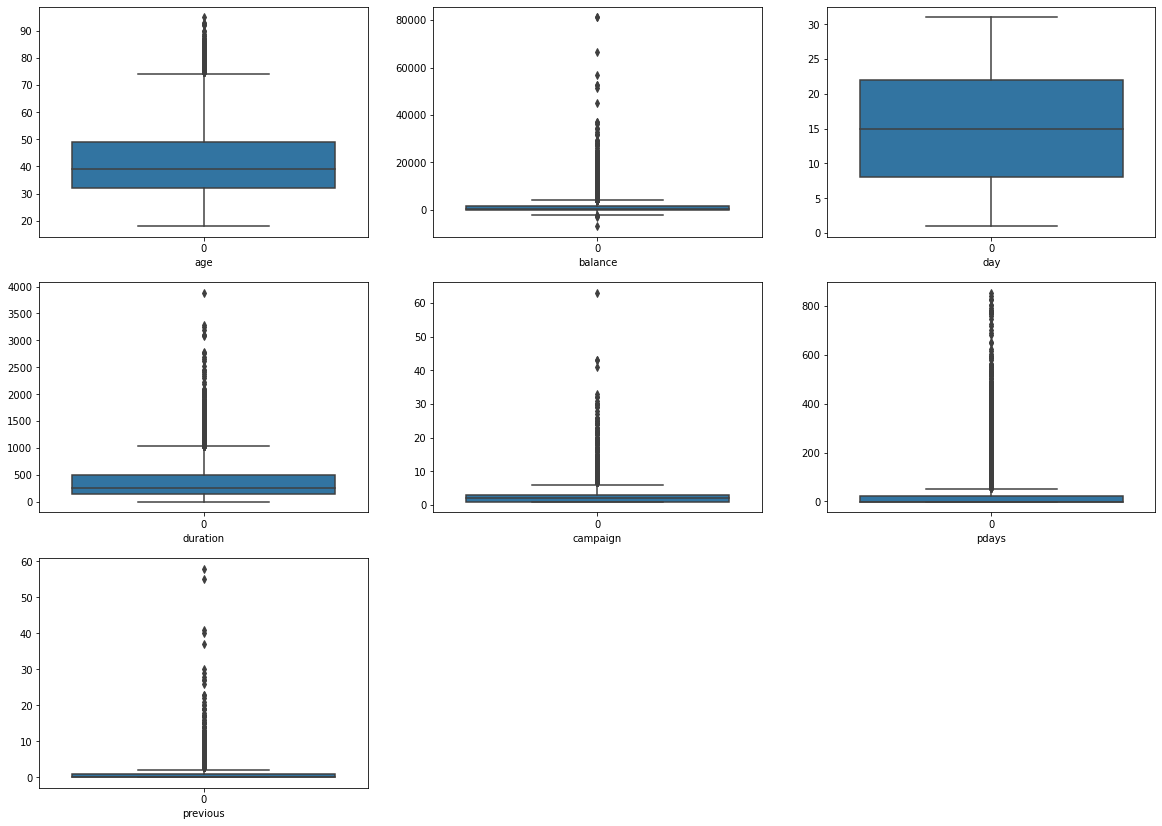

In [27]:
#boxplot on numerical features to find outliers
numerical_features = [feature for feature in Bank.columns if Bank[feature].dtypes != 'O']
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(Bank[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
    
plt.show()

C:\Users\Amir\AppData\Local\Temp\ipykernel_34728\3794251885.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Bank[numerical_feature])
C:\Users\Amir\AppData\Local\Temp\ipykernel_34728\3794251885.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Bank[numerical_feature])
C:\Users\Amir\AppData\

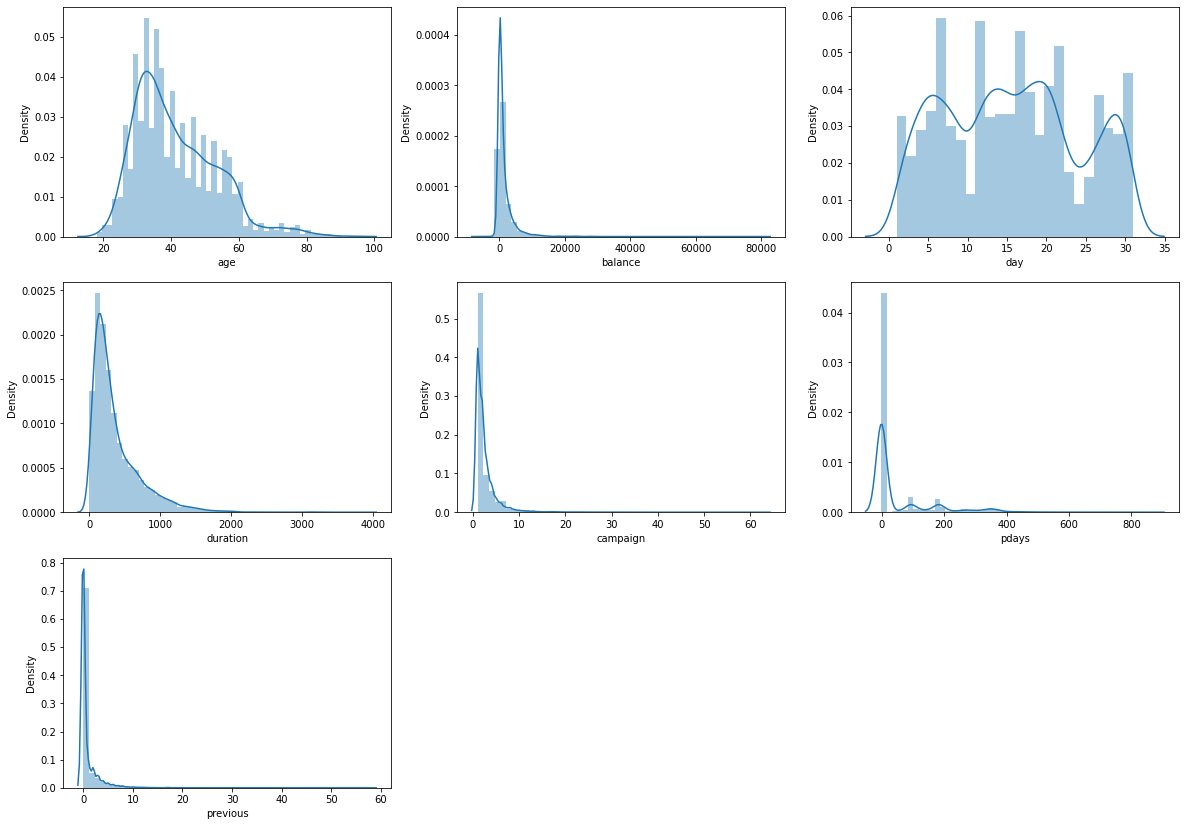

In [28]:
#displot on numerical features to find outliers
numerical_features = [feature for feature in Bank.columns if Bank[feature].dtypes != 'O']
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(Bank[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1 

plt.show()

In [29]:
from collections import Counter
def detect_outliers(data,features):
    outlier_indices = []
    for c in features:
        # 1st quartile
        Q1 = np.percentile(data[c],25)
        # 3rd quartile
        Q3 = np.percentile(data[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [30]:
# detect outliers from Age, Balance, Day, Duration, Campaign, Pdays, Previous
Outliers_to_drop = detect_outliers(Bank,["age","balance","day","duration","campaign","pdays","previous"])
Bank.loc[Outliers_to_drop] # Show the outliers rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2665,79,retired,married,secondary,no,723,no,no,telephone,9,sep,276,1,79,3,failure,yes
2778,76,housemaid,divorced,primary,no,1411,no,no,telephone,19,oct,233,2,187,3,success,yes
2809,82,retired,married,primary,no,8603,no,no,cellular,22,oct,306,3,107,1,success,yes
2820,77,management,married,unknown,no,1780,yes,no,cellular,23,oct,221,2,183,3,success,yes
2931,76,retired,married,primary,no,3324,no,no,cellular,13,nov,122,1,92,3,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9214,57,services,married,secondary,no,0,yes,no,cellular,14,may,16,9,282,3,other,no
10157,44,management,married,tertiary,no,1451,yes,no,cellular,5,feb,80,7,80,15,failure,no
10573,44,admin.,single,secondary,no,985,yes,yes,cellular,11,may,9,7,325,19,failure,no
10765,37,management,married,tertiary,no,26,no,no,cellular,17,jun,151,7,62,4,failure,no


In [33]:
Bank_IQR = Bank.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

(10942, 17)

In [36]:
Bank_IQR.shape

(10942, 17)

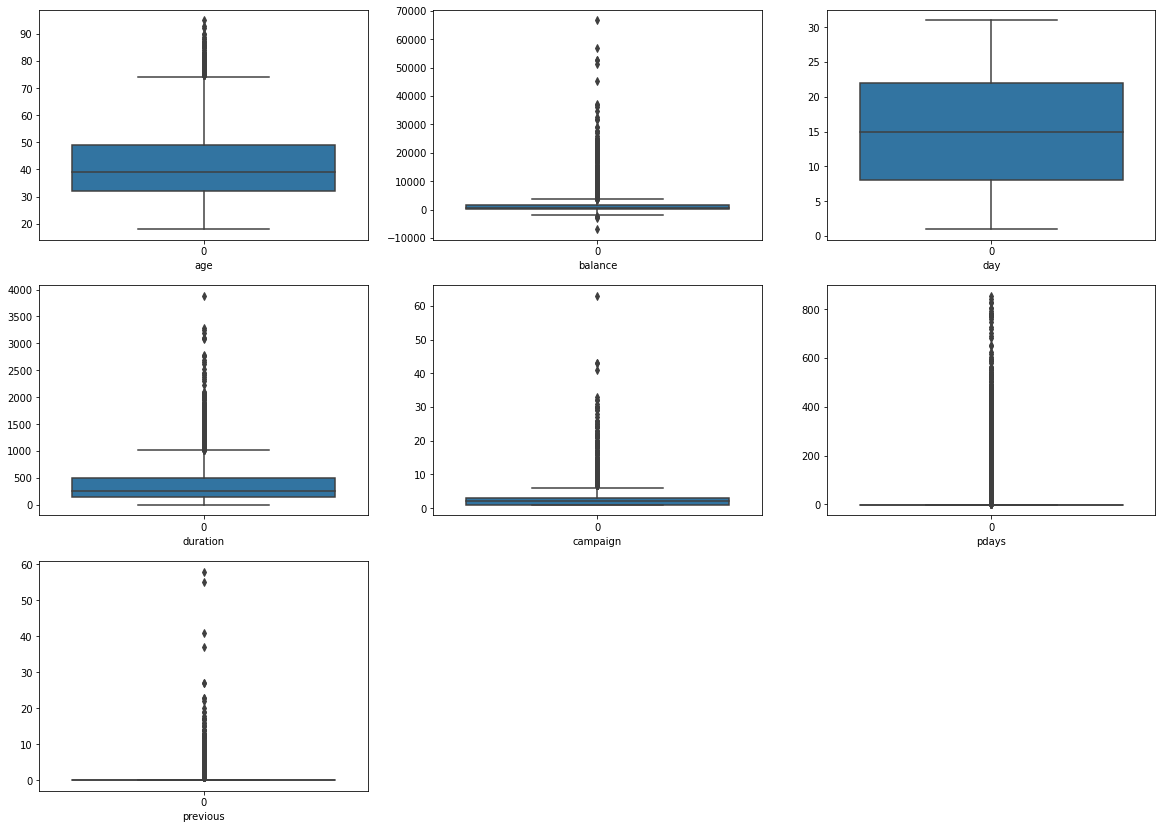

In [34]:
#plot the bars again to see the result
#boxplot on numerical features to find outliers
numerical_features = [feature for feature in Bank.columns if Bank[feature].dtypes != 'O']
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(Bank_IQR[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
    
plt.show()

In [38]:
#find z score for all numerical features
from scipy import stats
z = np.abs(stats.zscore(Bank[numerical_features]))
z

,age,balance,day,duration,campaign,pdays,previous
0,1.530121,0.316080,1.264501,1.966040,0.551372,0.463074,0.35343
1,1.273845,0.477172,1.264501,3.205843,0.551372,0.463074,0.35343
2,0.007534,0.054311,1.264501,2.978303,0.551372,0.463074,0.35343
3,1.188420,0.361990,1.264501,0.615383,0.551372,0.463074,0.35343
4,1.102995,0.429190,1.264501,0.889598,0.184707,0.463074,0.35343
...,...,...,...,...,...,...,...
10937,0.690936,0.492360,0.514461,0.323951,0.551372,0.463074,0.35343
10938,0.178384,0.239680,0.040071,0.831541,0.548624,0.463074,0.35343
10939,0.776361,0.482695,0.395863,0.618586,0.184707,0.463074,0.35343
10940,0.163317,0.492705,0.908709,1.047413,0.184707,1.150395,2.05696


In [44]:
#find the records with z score > 3 and remove them
Bank_z = Bank[(z < 3).all(axis=1)]

In [45]:
Bank_z.shape

(9856, 17)

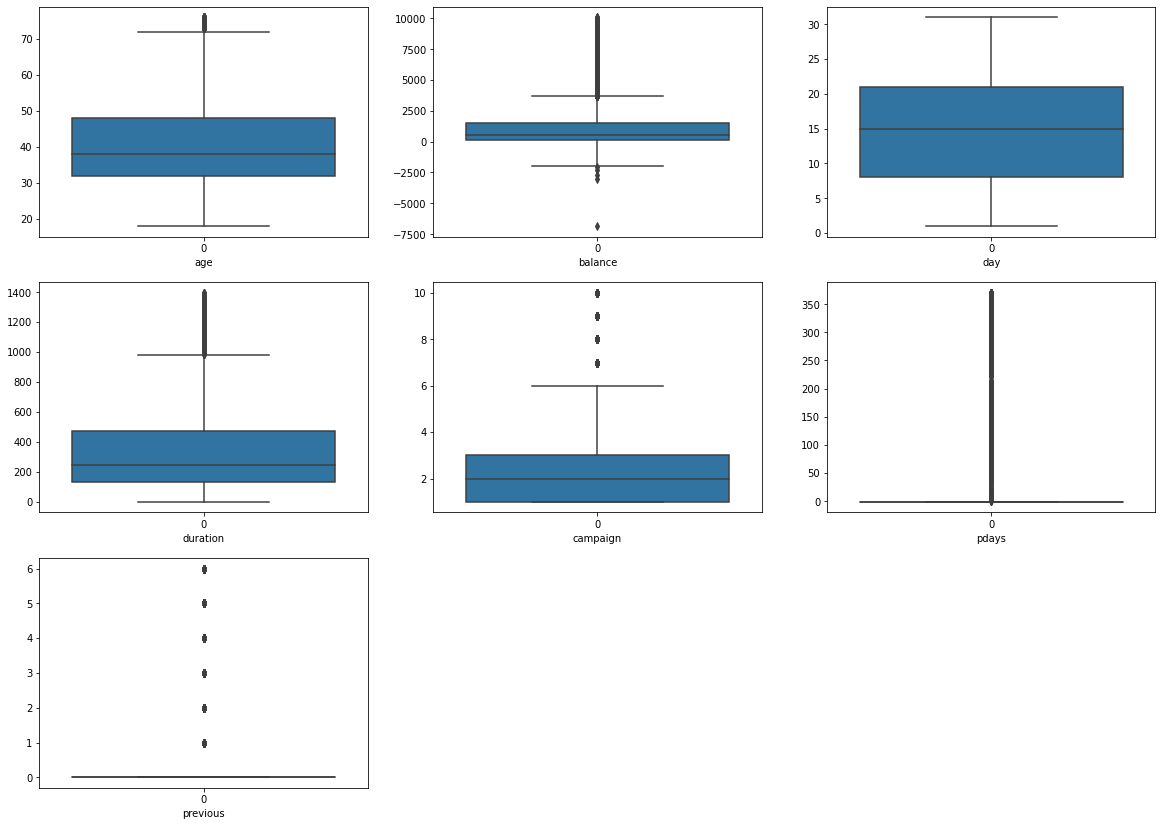

In [46]:
#plot the bars again to see the result
#boxplot on numerical features to find outliers
numerical_features = [feature for feature in Bank.columns if Bank[feature].dtypes != 'O']
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(Bank_z[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
    
plt.show()

C:\Users\Amir\AppData\Local\Temp\ipykernel_34728\3794251885.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Bank[numerical_feature])
C:\Users\Amir\AppData\Local\Temp\ipykernel_34728\3794251885.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Bank[numerical_feature])
C:\Users\Amir\AppData\

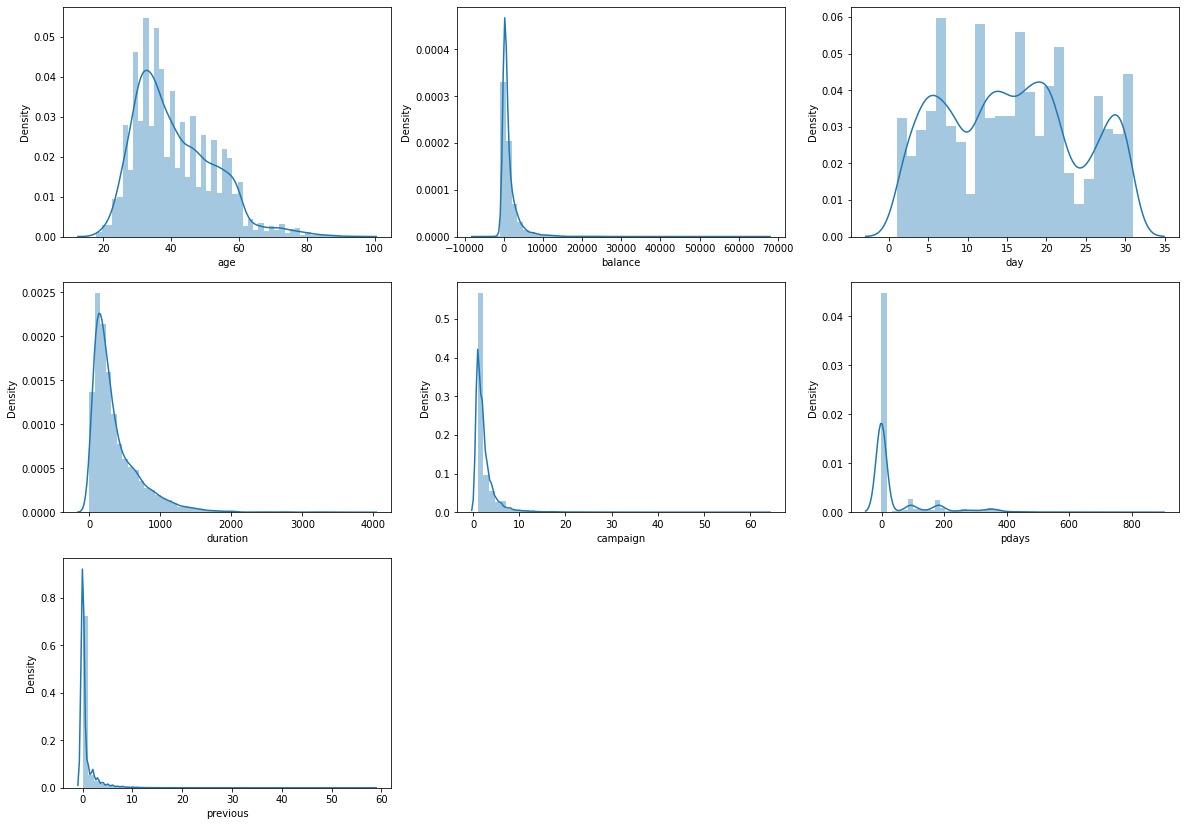

In [35]:
#displot on numerical features to find outliers
numerical_features = [feature for feature in Bank.columns if Bank[feature].dtypes != 'O']
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(Bank[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1 

plt.show()

b) تبدیل و استاندارد سازی داده ها (با بیان دلایل انتخاب هر روش برای هر فیلد)

c) دسته بندی مجدد (Reclassify) متغیرهای دسته¬ای

a) بررسی و تحلیل روابط تک متغیره بین متغیرهای پیشبین و متغیر هدف